<a href="https://colab.research.google.com/github/JMateusNSilva/python_uerj_2020_2/blob/master/exerc%C3%ADcios/aula10_continua%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
d_inicial = 0
d_final = 5
v = 12                          # km/h
t = [i for i in range(0,30)]    # intervalos de 1 minuto, 30 minutos
d = [d_inicial + v/60 *ti for ti in t] # v em km/min


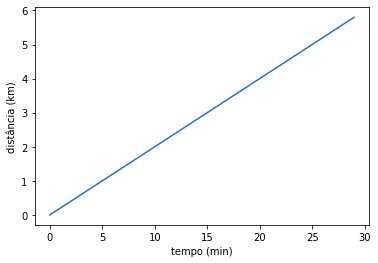

In [16]:
import matplotlib.pyplot as plt
plt.plot(t,d)
plt.xlabel('tempo (min)')
plt.ylabel('distância (km)')
plt.show()

In [17]:
i = d.index(5)
print("O atleta percorreu {0} quilômetros em {1} minutos". format(d[i],t[i]))

O atleta percorreu 5.0 quilômetros em 25 minutos


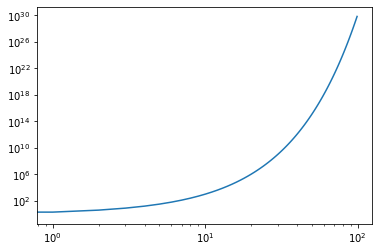

In [19]:
import math
import matplotlib.pyplot as plt

def f(t,y):
    """ exemplo de função
        Neste exemplo, dy/dt so depende de y.
    """
    return y 

t = range(0,100)   # t0 = 0
y=[]
y.append(1)        # y_0 = 1

dt = t[1] - t[0]   # Sabemos que nesse caso o intervalo é 1 pela construção da lista t, mas é melhor colacar para ser geral.

for i in range(1, 100):
      yi = y[i-1] + f(t[i-1], y[i-1]) * dt 
      y.append(yi)

plt.yscale('log')
plt.xscale('log')
plt.plot(t,y)
plt.show()

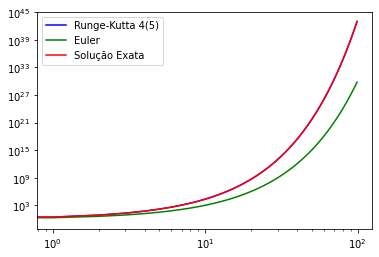

In [20]:
from scipy.integrate import solve_ivp
import numpy as np
import math

y0 = [1]
t = [i for i in range(0,100)]
sol = solve_ivp(f, [0,100], y0, method = 'RK45', t_eval=t)
#print(t)
#print(sol)
exp = [math.exp(i) for i in t]

# Vamos imprimir para comparar o método de Euler com o padrão da função 'solve_ivp' (Rk45)
plt.plot(sol.t, sol.y[0], 'b', label= 'Runge-Kutta 4(5)')
plt.plot(t,y, 'g', label = 'Euler')
plt.plot(t, exp, 'r', label= 'Solução Exata')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

1000 1000


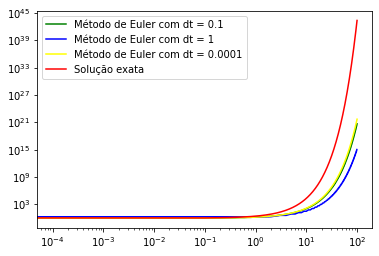

In [22]:
import math
import numpy as np

def f(t,y):
    """ Exemplo de função
        Nesse exemplo, dy/dt só depende de y.
    """
    return y

def Euler(fun, t, y0):

    y=[]
    y.append(y0)
    dt = t[1] - t[0]

    for i in range(len(t) -1) :
        yi = y[i-1] + fun(t[i-1],y[i-1]) * dt
        y.append(yi)
    return t, y

t = np.arange(0, 100, 0.1)
x,y = Euler(f,t,y0=1)

t2 = np.arange(0, 100, 1)
x2,y2 = Euler(f, t2, y0=1)

t3 = np.arange(0,100, 0.0001)
x3,y3 = Euler(f, t3, y0=1)

exp = [math.exp(i) for i in x]    # Solução exata

print(len(y), len(x))

plt.plot(x,  y,  'green',   label = 'Método de Euler com dt = 0.1')
plt.plot(x2, y2, 'blue',    label = 'Método de Euler com dt = 1')
plt.plot(x3, y3, 'yellow',  label = 'Método de Euler com dt = 0.0001')
plt.plot(t,  exp,'red',     label = 'Solução exata')

plt.yscale('log')
plt.xscale('log')
plt.legend()